# Libraries

In [1]:
import torch

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

## Выберем линейную регрессию

t_c = w * t_u + b

In [3]:
def model(t_u, w, b):
    return w * t_u + b

In [4]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

In [5]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [6]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

Транслирование

In [7]:
x = torch.ones(())
y = torch.ones(3, 1)
z = torch.ones(1, 3)

In [8]:
a = torch.ones(2, 1, 1)
print(f'shapes: x -> {x.shape}, y -> {y.shape}')
print(f'z: {z.shape}, a: {a.shape}')

shapes: x -> torch.Size([]), y -> torch.Size([3, 1])
z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])


In [9]:
print(f'x * y, {(x * y).shape}')
print(f'y * z, {(y * z).shape}')
print(f'y * z * a, {(y * z * a).shape}')

x * y, torch.Size([3, 1])
y * z, torch.Size([3, 3])
y * z * a, torch.Size([2, 3, 3])


# Градиентный спуск

In [10]:
delta = 0.1

loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) -
     loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)
loss_rate_of_change_w 

tensor(4517.2974)

In [11]:
# learning rate
learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w

In [12]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) -
     loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b

## с помощью производных

In [13]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [14]:
def model(t_u, w, b):
    return w * t_u + b

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

In [15]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)

    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [16]:
def trainig_lood(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b) # прямой проход
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)

        params = params - learning_rate * grad

        print(f'Epoch: {epoch}, Loss: {float(loss)}')
    return params

In [17]:
params = trainig_lood(200, 1e-2, torch.tensor([1.0, 0.0]), 0.1 * t_u, t_c)

Epoch: 1, Loss: 80.36434173583984
Epoch: 2, Loss: 37.574913024902344
Epoch: 3, Loss: 30.871076583862305
Epoch: 4, Loss: 29.756193161010742
Epoch: 5, Loss: 29.507152557373047
Epoch: 6, Loss: 29.3924560546875
Epoch: 7, Loss: 29.298828125
Epoch: 8, Loss: 29.208717346191406
Epoch: 9, Loss: 29.119415283203125
Epoch: 10, Loss: 29.030488967895508
Epoch: 11, Loss: 28.941877365112305
Epoch: 12, Loss: 28.853565216064453
Epoch: 13, Loss: 28.765552520751953
Epoch: 14, Loss: 28.6778507232666
Epoch: 15, Loss: 28.590431213378906
Epoch: 16, Loss: 28.503318786621094
Epoch: 17, Loss: 28.4164981842041
Epoch: 18, Loss: 28.329973220825195
Epoch: 19, Loss: 28.243741989135742
Epoch: 20, Loss: 28.157804489135742
Epoch: 21, Loss: 28.07215118408203
Epoch: 22, Loss: 27.986797332763672
Epoch: 23, Loss: 27.9017276763916
Epoch: 24, Loss: 27.81694984436035
Epoch: 25, Loss: 27.732463836669922
Epoch: 26, Loss: 27.648256301879883
Epoch: 27, Loss: 27.56434440612793
Epoch: 28, Loss: 27.4807071685791
Epoch: 29, Loss: 27.3

## Визуализация

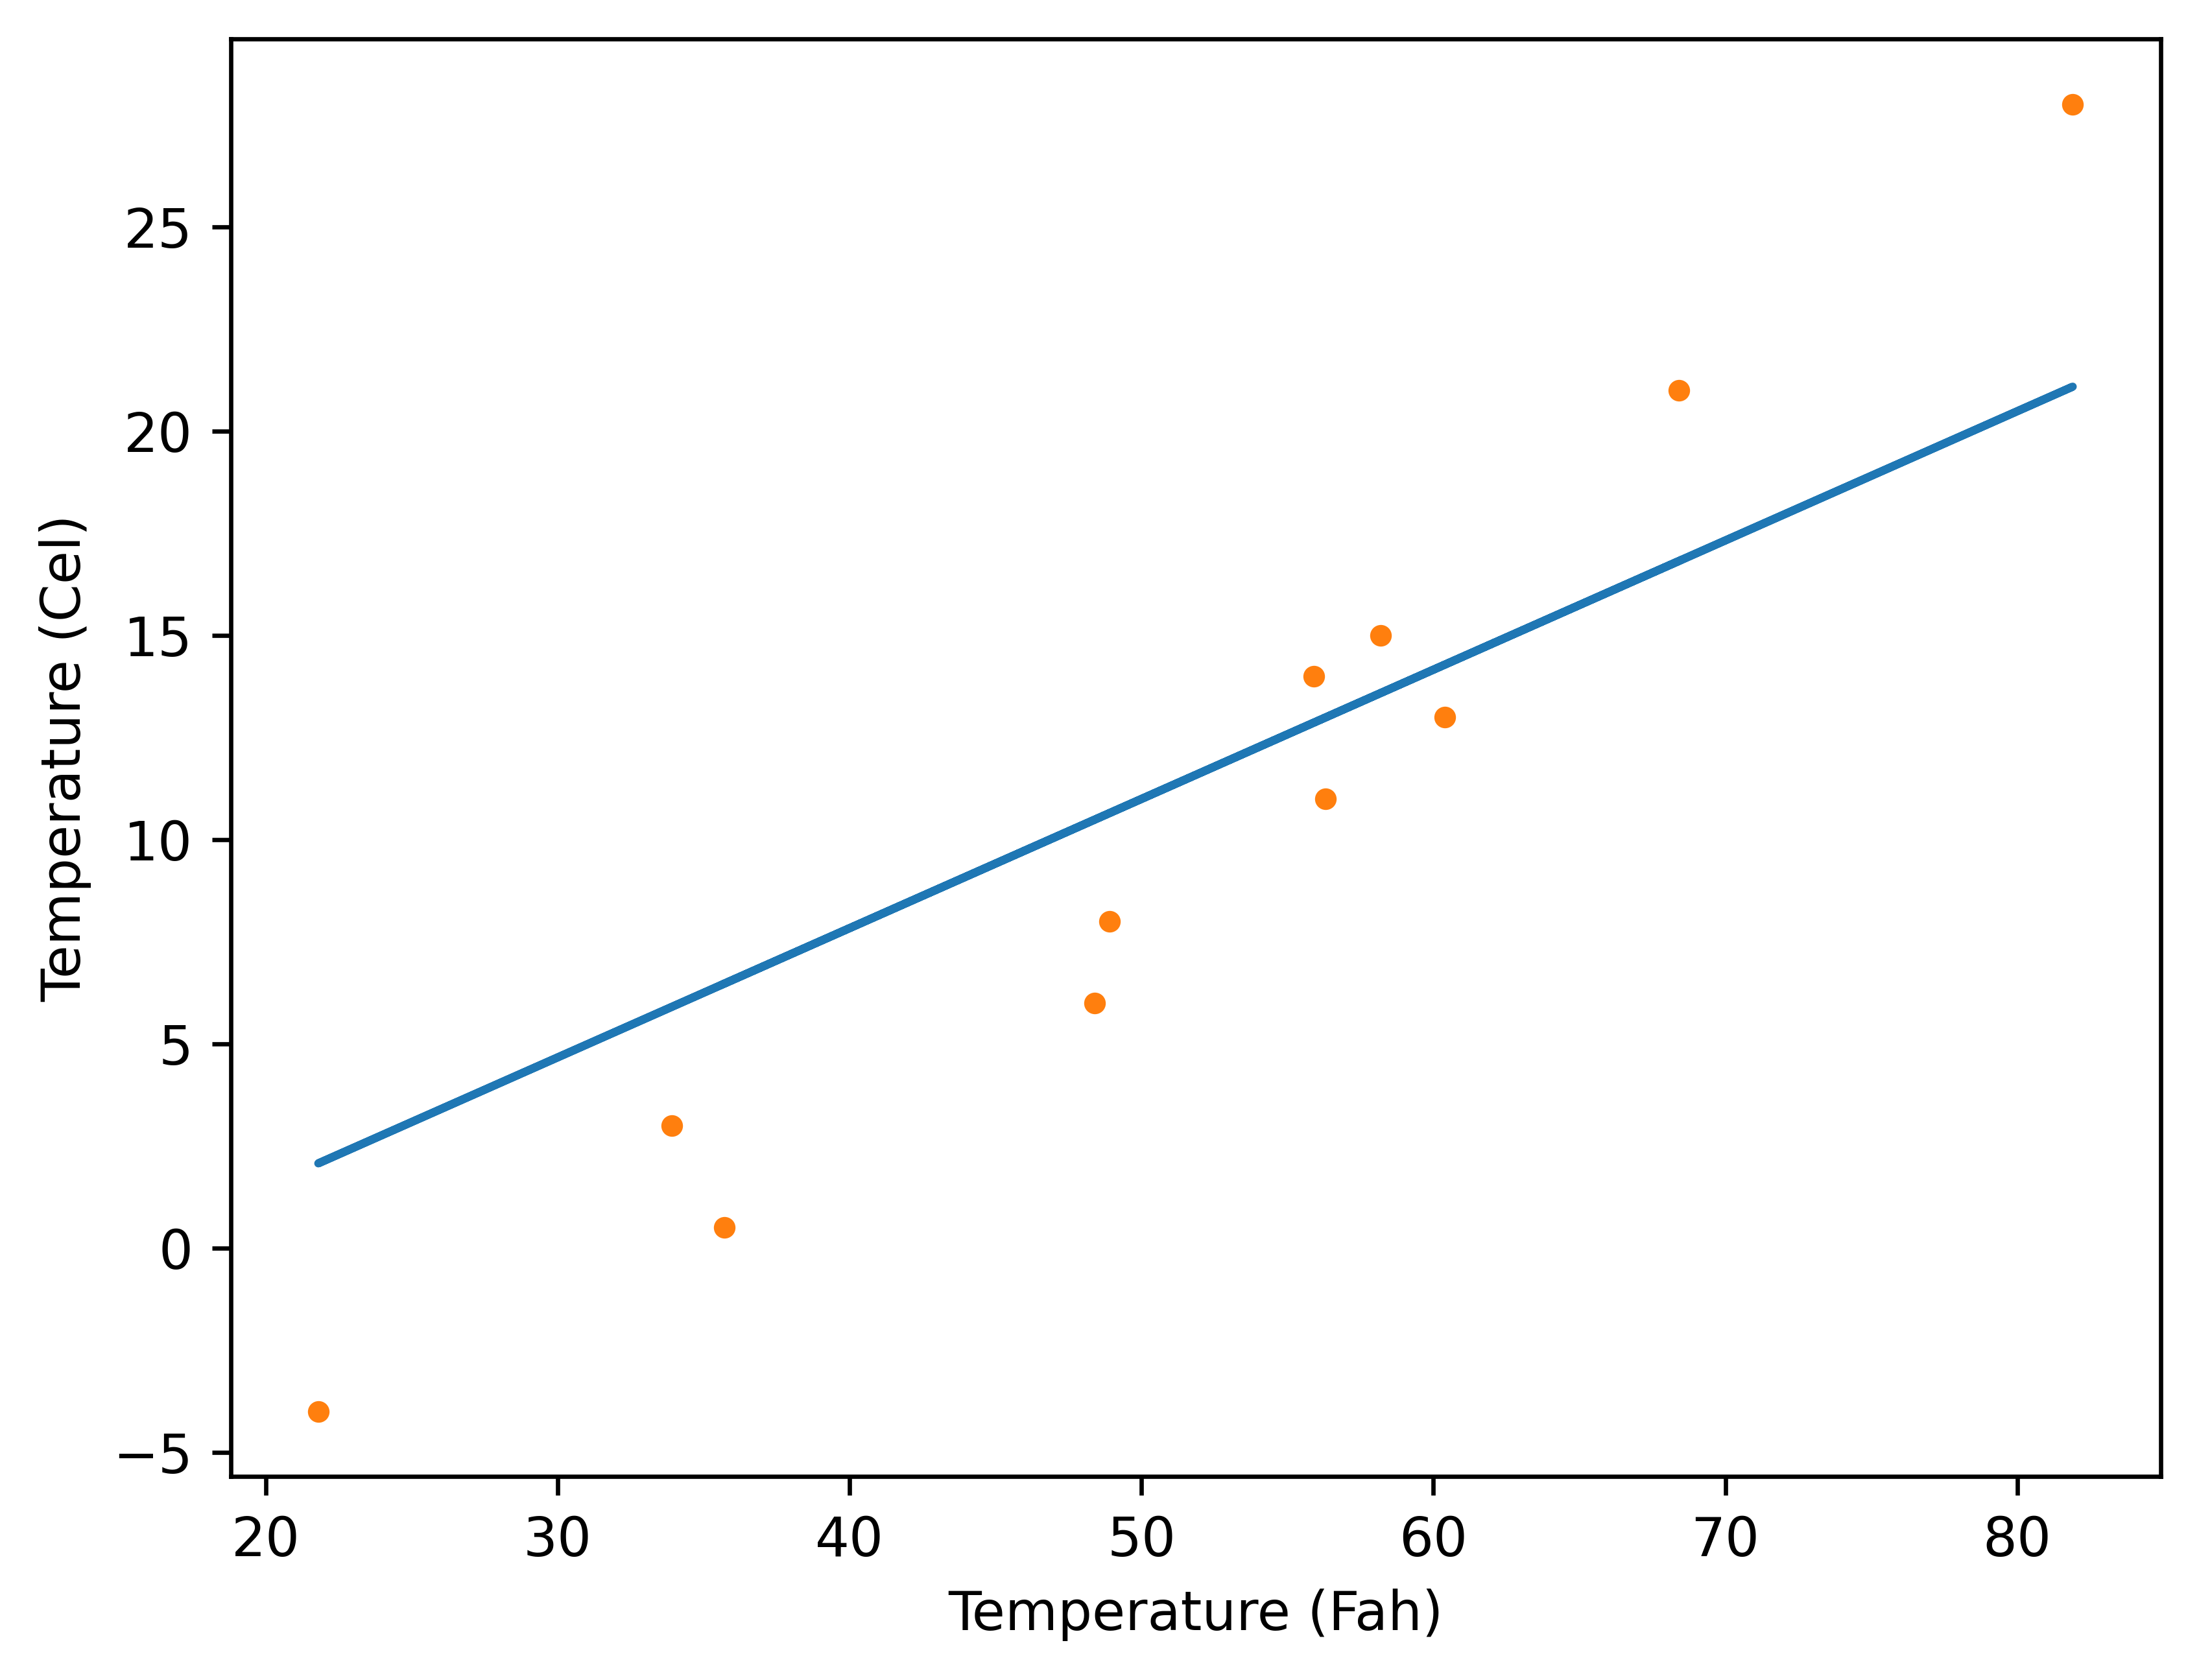

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt


t_p = model(t_u * 0.1, *params)

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (Fah)")
plt.ylabel("Temperature (Cel)")

plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), '.')

# autograd

In [19]:
def model(t_u, w, b):
    return w * t_u + b

In [20]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

In [21]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

In [22]:
loss = loss_fn(model(t_u, *params), t_c)
loss

tensor(1763.8848, grad_fn=<MeanBackward0>)

In [23]:
loss.backward()

In [24]:
params.grad

tensor([4517.2969,   82.6000])

## в аттрибуте grad лежат производные по параметрам

In [25]:
if params.grad is not None:
    params.grad.zero_()

In [26]:
params.grad

tensor([0., 0.])

In [27]:
def trainig_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()

        t_p = model(t_u, *params) # прямой проход
        loss = loss_fn(t_p, t_c)
        loss.backward()

        with torch.no_grad():
            params -= learning_rate * params.grad

        print(f'Epoch: {epoch}, Loss: {float(loss)}')
    return params

In [28]:
trainig_loop(
    n_epochs=5_000,
    learning_rate=1e-2,
    params=torch.tensor([1.0, 0.0], requires_grad=True),
    t_u=t_u * 0.1,
    t_c=t_c
)

Epoch: 1, Loss: 80.36434173583984
Epoch: 2, Loss: 37.574913024902344
Epoch: 3, Loss: 30.871076583862305
Epoch: 4, Loss: 29.756193161010742
Epoch: 5, Loss: 29.507152557373047
Epoch: 6, Loss: 29.3924560546875
Epoch: 7, Loss: 29.298828125
Epoch: 8, Loss: 29.208717346191406
Epoch: 9, Loss: 29.119415283203125
Epoch: 10, Loss: 29.030488967895508
Epoch: 11, Loss: 28.941877365112305
Epoch: 12, Loss: 28.853565216064453
Epoch: 13, Loss: 28.765552520751953
Epoch: 14, Loss: 28.6778507232666
Epoch: 15, Loss: 28.590431213378906
Epoch: 16, Loss: 28.503318786621094
Epoch: 17, Loss: 28.4164981842041
Epoch: 18, Loss: 28.329973220825195
Epoch: 19, Loss: 28.243741989135742
Epoch: 20, Loss: 28.157804489135742
Epoch: 21, Loss: 28.07215118408203
Epoch: 22, Loss: 27.986797332763672
Epoch: 23, Loss: 27.9017276763916
Epoch: 24, Loss: 27.81694984436035
Epoch: 25, Loss: 27.732463836669922
Epoch: 26, Loss: 27.648256301879883
Epoch: 27, Loss: 27.56434440612793
Epoch: 28, Loss: 27.4807071685791
Epoch: 29, Loss: 27.3

tensor([  5.3671, -17.3012], requires_grad=True)

## Optimizers

In [29]:
import torch.optim as optim

In [30]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [31]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

/home/artem/micromamba/envs/ml/lib/python3.11/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [32]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad()
loss.backward()

optimizer.step()

print(params)



tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)


In [33]:
def trainig_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        optimizer.zero_grad()
        t_p = model(t_u, *params) # прямой проход
        loss = loss_fn(t_p, t_c)
        loss.backward()
        optimizer.step()

        print(f'Epoch: {epoch}, Loss: {float(loss)}')
    return params

In [34]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.Adam([params], lr=learning_rate)

trainig_loop(
    n_epochs=10_000,
    optimizer=optimizer,
    params=params,
    t_u=t_u,
    t_c=t_c,
)

Epoch: 1, Loss: 1763.884765625
Epoch: 2, Loss: 1718.1903076171875
Epoch: 3, Loss: 1673.1212158203125
Epoch: 4, Loss: 1628.688720703125
Epoch: 5, Loss: 1584.9019775390625
Epoch: 6, Loss: 1541.7716064453125
Epoch: 7, Loss: 1499.30517578125
Epoch: 8, Loss: 1457.5120849609375
Epoch: 9, Loss: 1416.400390625
Epoch: 10, Loss: 1375.9766845703125
Epoch: 11, Loss: 1336.2479248046875
Epoch: 12, Loss: 1297.2205810546875
Epoch: 13, Loss: 1258.8994140625
Epoch: 14, Loss: 1221.2894287109375
Epoch: 15, Loss: 1184.3946533203125
Epoch: 16, Loss: 1148.2183837890625
Epoch: 17, Loss: 1112.76318359375
Epoch: 18, Loss: 1078.03125
Epoch: 19, Loss: 1044.0234375
Epoch: 20, Loss: 1010.7406616210938
Epoch: 21, Loss: 978.1828002929688
Epoch: 22, Loss: 946.348876953125
Epoch: 23, Loss: 915.2373657226562
Epoch: 24, Loss: 884.846435546875
Epoch: 25, Loss: 855.1734008789062
Epoch: 26, Loss: 826.2144775390625
Epoch: 27, Loss: 797.9663696289062
Epoch: 28, Loss: 770.4238891601562
Epoch: 29, Loss: 743.5823364257812
Epoch:

tensor([  0.5368, -17.3047], requires_grad=True)

## Разбиение выборки на обучающую и валидационную

In [36]:
n_samples = t_u.shape[0]
n_val = int(.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
valid_indices = shuffled_indices[-n_val:]

train_indices, valid_indices

(tensor([10,  8,  3,  2,  5,  6,  0,  4,  9]), tensor([1, 7]))

In [41]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

valid_t_u = t_u[valid_indices]
valid_t_c = t_c[valid_indices]

train_t_un = 0.1 * train_t_u
valid_t_un = 0.1 * valid_t_u

In [42]:
def trainig_loop(n_epochs, optimizer, params, train_t_u, valid_t_u, train_t_c, valid_t_c):
    for epoch in range(n_epochs):
        train_t_p = model(train_t_u, *params) # прямой проход
        train_loss = loss_fn(train_t_p, train_t_c)
        
        valid_t_p = model(valid_t_u, *params) # прямой проход
        valid_loss = loss_fn(valid_t_p, valid_t_c)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        print(f'Epoch: {epoch+1}, Train Loss: {float(train_loss)}, Valid Loss: {float(valid_loss)}')
    return params

In [48]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

trainig_loop(
    n_epochs=1200,
    optimizer=optimizer,
    params=params,
    train_t_u=train_t_un,
    valid_t_u=valid_t_un,
    train_t_c=train_t_c,
    valid_t_c=valid_t_c,
)

Epoch: 1, Train Loss: 86.12081909179688, Valid Loss: 54.46025085449219
Epoch: 2, Train Loss: 33.77035903930664, Valid Loss: 39.48276901245117
Epoch: 3, Train Loss: 27.580820083618164, Valid Loss: 40.98611068725586
Epoch: 4, Train Loss: 26.802715301513672, Valid Loss: 42.195167541503906
Epoch: 5, Train Loss: 26.659103393554688, Valid Loss: 42.60951232910156
Epoch: 6, Train Loss: 26.590003967285156, Valid Loss: 42.671268463134766
Epoch: 7, Train Loss: 26.529769897460938, Valid Loss: 42.60332107543945
Epoch: 8, Train Loss: 26.470706939697266, Valid Loss: 42.49020004272461
Epoch: 9, Train Loss: 26.411903381347656, Valid Loss: 42.361793518066406
Epoch: 10, Train Loss: 26.35326385498047, Valid Loss: 42.22840118408203
Epoch: 11, Train Loss: 26.294775009155273, Valid Loss: 42.09356689453125
Epoch: 12, Train Loss: 26.23642921447754, Valid Loss: 41.958499908447266
Epoch: 13, Train Loss: 26.178224563598633, Valid Loss: 41.82360076904297
Epoch: 14, Train Loss: 26.120166778564453, Valid Loss: 41.68

tensor([  4.9000, -14.7993], requires_grad=True)